### 1.1 Import Required Libraries

In [8]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 200)
%matplotlib inline
sns.set_theme()

### 1.2 Load and Explore Raw Data

In [9]:
# Define data directory and list all CSV files
data_dir = '../data'
csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

print(f'Found {len(csv_files)} CSV files in {data_dir}:')
for file in csv_files:
    print(f'- {file}')

Found 6 CSV files in ../data:
- aa_dataset-tickets-multi-lang-5-2-50-version.csv
- cleaned_tickets.csv
- dataset-tickets-german_normalized.csv
- dataset-tickets-german_normalized_50_5_2.csv
- dataset-tickets-multi-lang-4-20k.csv
- dataset-tickets-multi-lang3-4k.csv


### 1.3 Load and Combine All CSV Files

In [10]:
# Function to load and combine CSV files
def load_and_combine_csvs(directory, file_list):
    dfs = []
    for file in file_list:
        file_path = os.path.join(directory, file)
        print(f'Loading {file}...')
        try:
            # Try different encodings if needed
            df = pd.read_csv(file_path, encoding='latin1')
            dfs.append(df)
            print(f'  - Loaded {len(df)} rows, {len(df.columns)} columns')
            print(f'  - Columns: {list(df.columns)}')
            print('\n' + '='*80 + '\n')
        except Exception as e:
            print(f'Error loading {file}: {str(e)}')
    
    # Combine all dataframes
    if dfs:
        combined_df = pd.concat(dfs, ignore_index=True)
        print(f'Combined dataset shape: {combined_df.shape}')
        return combined_df
    else:
        print('No data was loaded.')
        return None

# Load and combine all CSV files
raw_data = load_and_combine_csvs(data_dir, csv_files)

Loading aa_dataset-tickets-multi-lang-5-2-50-version.csv...
  - Loaded 28587 rows, 16 columns
  - Columns: ['subject', 'body', 'answer', 'type', 'queue', 'priority', 'language', 'version', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7', 'tag_8']


Loading cleaned_tickets.csv...
  - Loaded 67890 rows, 22 columns
  - Columns: ['subject', 'body', 'answer', 'type', 'queue', 'language', 'version', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7', 'tag_8', 'business_type', 'tag_9', 'priority_critical', 'priority_high', 'priority_low', 'priority_medium', 'priority_very_low']


Loading dataset-tickets-german_normalized.csv...
  - Loaded 2125 rows, 5 columns
  - Columns: ['subject', 'body', 'queue', 'priority', 'language']


Loading dataset-tickets-german_normalized_50_5_2.csv...
  - Loaded 13178 rows, 5 columns
  - Columns: ['subject', 'body', 'queue', 'priority', 'language']


Loading dataset-tickets-multi-lang-4-20k.csv...
  - Loaded 20000 rows, 15 columns
  - Col

### 1.4 Initial Data Exploration

In [11]:
# Display basic information about the combined dataset
if raw_data is not None:
    print('\n=== Dataset Info ===')
    print(raw_data.info())
    
    print('\n=== First 5 Rows ===')
    display(raw_data.head())
    
    print('\n=== Basic Statistics ===')
    display(raw_data.describe(include='all'))


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135780 entries, 0 to 135779
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   subject            130013 non-null  object 
 1   body               135777 non-null  object 
 2   answer             120466 non-null  object 
 3   type               120477 non-null  object 
 4   queue              135780 non-null  object 
 5   priority           67890 non-null   object 
 6   language           135780 non-null  object 
 7   version            96477 non-null   float64
 8   tag_1              120477 non-null  object 
 9   tag_2              120418 non-null  object 
 10  tag_3              120246 non-null  object 
 11  tag_4              115879 non-null  object 
 12  tag_5              98889 non-null   object 
 13  tag_6              83296 non-null   object 
 14  tag_7              74903 non-null   object 
 15  tag_8              70631 non-

,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,business_type,tag_9,priority_critical,priority_high,priority_low,priority_medium,priority_very_low
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich mÃ¶chte einen gravierenden Sicherheitsvorfall melden, der gegenwÃ¤rtig mehrere Komponenten unserer Infrastruktur betrifft. Betroffene GerÃ¤te umfassen Projektore...",Vielen Dank fÃ¼r die Meldung des kritischen Sicherheitsvorfalls und die Bereitstellung der Ãbersicht Ã¼ber die betroffenen GerÃ¤te sowie der ergriffenen ersten MaÃnahmen. Wir erkennen die Dringl...,Incident,Technical Support,high,de,51.0,Security,Outage,Disruption,Data Breach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to report a significant problem with the centralized account management portal, which currently appears to be offline. This outage is blocking access to...","Thank you for reaching out, <name>. We are aware of the outage affecting the centralized account management system, and our technical team is actively working to resolve the issue. In the meantime...",Incident,Technical Support,high,en,51.0,Account,Disruption,Outage,IT,Tech Support,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Query About Smart Home System Integration Features,"Dear Customer Support Team,\n\nI hope this message reaches you well. I am reaching out to request detailed information about the capabilities of your smart home integration products listed on your...","Thank you for your inquiry. Our products support integration with Amazon Alexa, Google Assistant, and Apple HomeKit. Compatibility details can differ depending on the specific item; please let us ...",Request,Returns and Exchanges,medium,en,51.0,Product,Feature,Tech Support,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this message finds you well. I am reaching out to request clarification about the billing and payment procedures linked to my account. Recently, I observed so...","We appreciate you reaching out with your billing questions. The billing period generally begins on the first day of the month and concludes on the last day, with payments due by the 10th of the fo...",Request,Billing and Payments,low,en,51.0,Billing,Payment,Account,Documentation,Feedback,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Question About Marketing Agency Software Compatibility,"Dear Support Team,\n\nI hope this message reaches you well. I am reaching out to ask about the compatibility of your products with the specific needs of marketing agencies. Our company is consider...","Thank you for your inquiry. Our product supports integration with major CRM, email marketing, and analytics platforms through APIs and customization options. Please specify the tools you are using...",Problem,Sales and Pre-Sales,medium,en,51.0,Product,Feature,Feedback,Tech Support,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



=== Basic Statistics ===


,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,business_type,tag_9,priority_critical,priority_high,priority_low,priority_medium,priority_very_low
count,130013,135777,120466,120477,135780,67890,135780,96477.000000,120477,120418,120246,115879,98889,83296,74903,70631,71890,67890.0,6.789000e+04,6.789000e+04,6.789000e+04,6.789000e+04,6.789000e+04
unique,52218,62533,44140,5,62,5,5,NaN,252,406,659,928,1040,1002,821,562,10,NaN,NaN,NaN,NaN,NaN,NaN
top,Unknown,Assistance Required,Unknown,Incident,Technical Support,medium,de,NaN,Security,Performance,IT,Tech Support,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
freq,5766,6,15314,42104,31006,25864,72954,NaN,18312,17396,18860,20008,36891,52484,60877,65149,63890,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.487090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.339659e-17,-1.155456e-16,-4.102707e-17,7.116940e-17,4.018978e-17
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.951651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.671323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1.703248e-01,-7.430281e-01,-5.138194e-01,-7.844925e-01,-1.642298e-01
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.671323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1.703248e-01,-7.430281e-01,-5.138194e-01,-7.844925e-01,-1.642298e-01
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.373519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1.703248e-01,-7.430281e-01,-5.138194e-01,-7.844925e-01,-1.642298e-01
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1.703248e-01,1.345844e+00,-5.138194e-01,1.274709e+00,-1.642298e-01


### 1.5 Data Cleaning

In [12]:
def clean_data(df):
    # Make a copy of the dataframe
    df_clean = df.copy()
    
    # 1. Handle missing values
    print('\n=== Handling Missing Values ===')
    missing = df_clean.isnull().sum()
    print('Missing values per column:')
    print(missing[missing > 0].sort_values(ascending=False))
    
    # 2. Convert date columns to datetime
    print('\n=== Converting Date Columns ===')
    date_columns = [col for col in df_clean.columns if 'date' in col.lower() or 'time' in col.lower()]
    for col in date_columns:
        try:
            df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')
            print(f'Converted {col} to datetime')
        except Exception as e:
            print(f'Could not convert {col}: {str(e)}')
    
    # 3. Clean text columns
    print('\n=== Cleaning Text Columns ===')
    text_columns = df_clean.select_dtypes(include=['object']).columns
    for col in text_columns:
        df_clean[col] = df_clean[col].astype(str).str.strip()
        df_clean[col] = df_clean[col].replace(['nan', 'None', 'NaT', 'N/A', ''], np.nan)
    
    # 4. Fill missing values
    # For categorical columns
    for col in df_clean.select_dtypes(include=['object']).columns:
        if df_clean[col].isnull().any():
            df_clean[col] = df_clean[col].fillna('Unknown')
    
    # For numerical columns
    for col in df_clean.select_dtypes(include=[np.number]).columns:
        if df_clean[col].isnull().any():
            median_val = df_clean[col].median()
            df_clean[col] = df_clean[col].fillna(median_val)
    
    print('\nData cleaning completed!')
    return df_clean

# Clean the data
if raw_data is not None:
    cleaned_data = clean_data(raw_data)
    print('\nCleaned data shape:', cleaned_data.shape)


=== Handling Missing Values ===
Missing values per column:
priority             67890
priority_medium      67890
priority_very_low    67890
priority_low         67890
priority_high        67890
tag_9                67890
priority_critical    67890
tag_8                65149
business_type        63890
tag_7                60877
tag_6                52484
version              39303
tag_5                36891
tag_4                19901
tag_3                15534
tag_2                15362
answer               15314
type                 15303
tag_1                15303
subject               5767
body                     3
dtype: int64

=== Converting Date Columns ===

=== Cleaning Text Columns ===

Data cleaning completed!

Cleaned data shape: (135780, 23)


### 1.6 Save Processed Data

In [13]:
# Create processed data directory if it doesn't exist
os.makedirs('../data/processed', exist_ok=True)

# Save the cleaned data
if 'cleaned_data' in locals():
    output_path = '../data/processed/processed_tickets.csv'
    cleaned_data.to_csv(output_path, index=False)
    print(f'\nProcessed data saved to {output_path}')
    
    # Display basic info about the saved data
    print('\n=== Processed Data Info ===')
    print(f'Shape: {cleaned_data.shape}')
    print('\nFirst 3 rows:')
    display(cleaned_data.head(3))


Processed data saved to ../data/processed/processed_tickets.csv

=== Processed Data Info ===
Shape: (135780, 23)

First 3 rows:


,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,business_type,tag_9,priority_critical,priority_high,priority_low,priority_medium,priority_very_low
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich mÃ¶chte einen gravierenden Sicherheitsvorfall melden, der gegenwÃ¤rtig mehrere Komponenten unserer Infrastruktur betrifft. Betroffene GerÃ¤te umfassen Projektore...",Vielen Dank fÃ¼r die Meldung des kritischen Sicherheitsvorfalls und die Bereitstellung der Ãbersicht Ã¼ber die betroffenen GerÃ¤te sowie der ergriffenen ersten MaÃnahmen. Wir erkennen die Dringl...,Incident,Technical Support,high,de,51.0,Security,Outage,Disruption,Data Breach,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,-0.170325,-0.743028,-0.513819,-0.784493,-0.16423
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to report a significant problem with the centralized account management portal, which currently appears to be offline. This outage is blocking access to...","Thank you for reaching out, <name>. We are aware of the outage affecting the centralized account management system, and our technical team is actively working to resolve the issue. In the meantime...",Incident,Technical Support,high,en,51.0,Account,Disruption,Outage,IT,Tech Support,Unknown,Unknown,Unknown,Unknown,0.0,-0.170325,-0.743028,-0.513819,-0.784493,-0.16423
2,Query About Smart Home System Integration Features,"Dear Customer Support Team,\n\nI hope this message reaches you well. I am reaching out to request detailed information about the capabilities of your smart home integration products listed on your...","Thank you for your inquiry. Our products support integration with Amazon Alexa, Google Assistant, and Apple HomeKit. Compatibility details can differ depending on the specific item; please let us ...",Request,Returns and Exchanges,medium,en,51.0,Product,Feature,Tech Support,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,-0.170325,-0.743028,-0.513819,-0.784493,-0.16423


### 1.7 Basic Visualizations

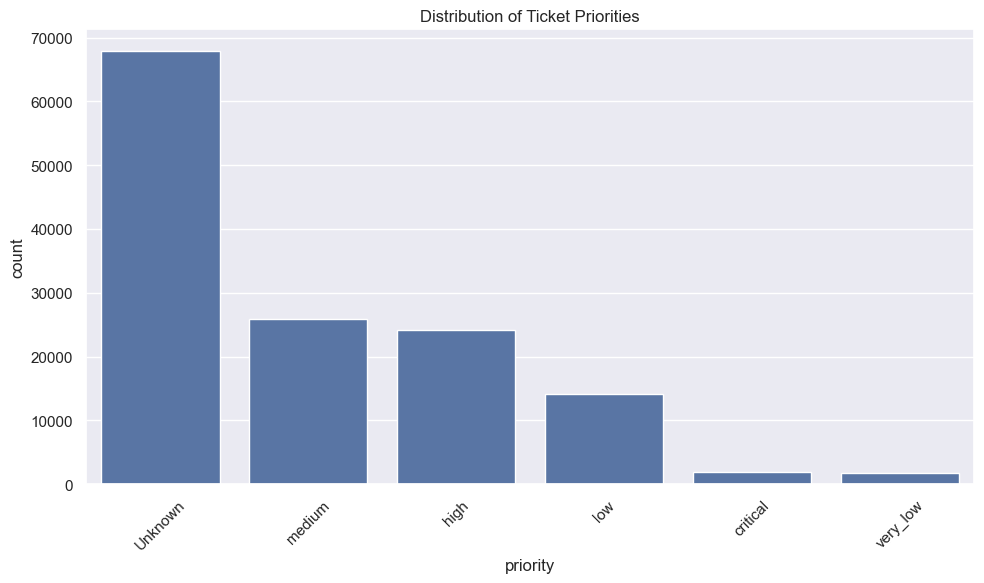

In [14]:
# Create visualizations directory
os.makedirs('../outputs/plots', exist_ok=True)

if 'cleaned_data' in locals():
    # 1. Plot distribution of ticket priorities
    if 'priority' in cleaned_data.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=cleaned_data, x='priority', order=cleaned_data['priority'].value_counts().index)
        plt.title('Distribution of Ticket Priorities')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('../outputs/plots/priority_distribution.png')
        plt.show()